In [2]:
library(phyloseq)
library(ggplot2)
library(dplyr)
library(ggpubr)
library(viridis)

In [5]:
songbird_results = read.csv("/home/holutz/projects/skin_project/Songbird/Differentials_for_plotting/songbird_results_w_taxa.csv")

#Filter to just one of the four host taxa I have in my dataset
#For me, positive values are associated with ectoparasitism, negative values with non-ectoparasitism
hcaffer = subset(songbird_results, Host=="Hcaffer")

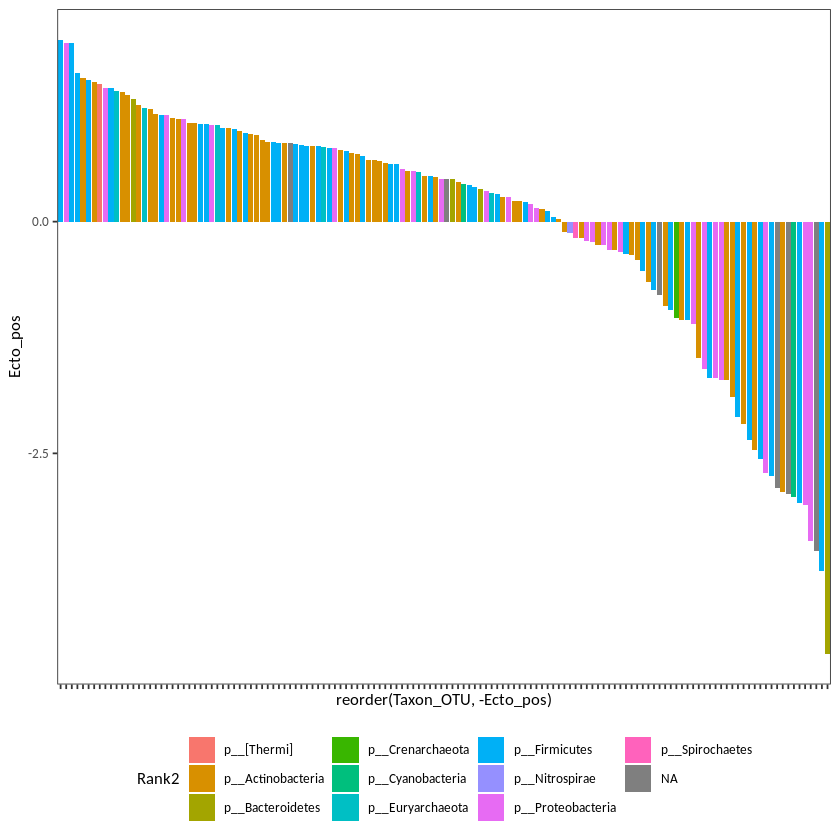

In [7]:
p = ggplot(hcaffer, aes(x = reorder(Taxon_OTU, -Ecto_pos), y = Ecto_pos, fill=Rank2)) + geom_bar(stat="identity")
                               
#Option to add labels to each bar
#p = p + geom_text(aes(label=Shared), position=position_dodge(width=0.9), vjust=-0.25)

#Option one for filling with colors from the 'viridis' library
#p = p + scale_fill_viridis(option="magma", discrete=TRUE, direction=-1) 


#Option two for specifying two colors for column where I specify 'Taxon A' (e.g. "Actinobacteria") vs 'other'
#p = p + scale_fill_manual(values=c("Orange","Gray"))

#Option three for specifying n = 4 colors, for column with four values. You can customize these as much as you want
#p = p + scale_fill_manual(values=c("#273253",
#                                    "#ED5C4D",
#                                    "#F4E9DA",
#                                    "#FBBE4B")

p = p + theme_bw() + theme(text=element_text(size=10, color="black",family="Calibri"),
                           #legend.key = element_blank(),
                           #axis.text.x = element_text(angle = 90, hjust = 1),
                           axis.text.x = element_blank(),
                           plot.title = element_text(hjust = 0.5),
                           legend.position = "bottom",
                           #axis.title.y=element_blank(),
                           panel.grid.major = element_blank(),
                           panel.grid.minor = element_blank())

#Option to trunacte x-axis labels to specified number of characters
#p = p + scale_x_discrete(label = function(x) stringr::str_trunc(x, 35))

p

#Save image with desired specifications to desired location
#png('/home/holutz/projects/skin_project/ANCOM/ancom.actino.labels.png', width=12, height=12, units='in', res=500)
#plot(p)
#dev.off()

If I want to focus on a particular bacteiral group, I can use the following code to add a new column to my imported data, copying one column and replacing values... so basically with the command mutate, I am saying "Copy column Rank4 and call it 'Actino'", then the subsequent lines say "call anything that is not 'o__Actinomycetales' 'other'"

In [8]:
actino = hcaffer %>%
mutate(Actino = Rank4)

actino$Actino = as.character(actino$Actino)
actino$Actino[which(actino$Rank4 != "o__Actinomycetales")] = "Other"
actino$Actino = as.factor(actino$Actino)
head(actino$Actino)

[1] Other Other Other Other Other <NA> 
Levels: o__Actinomycetales Other

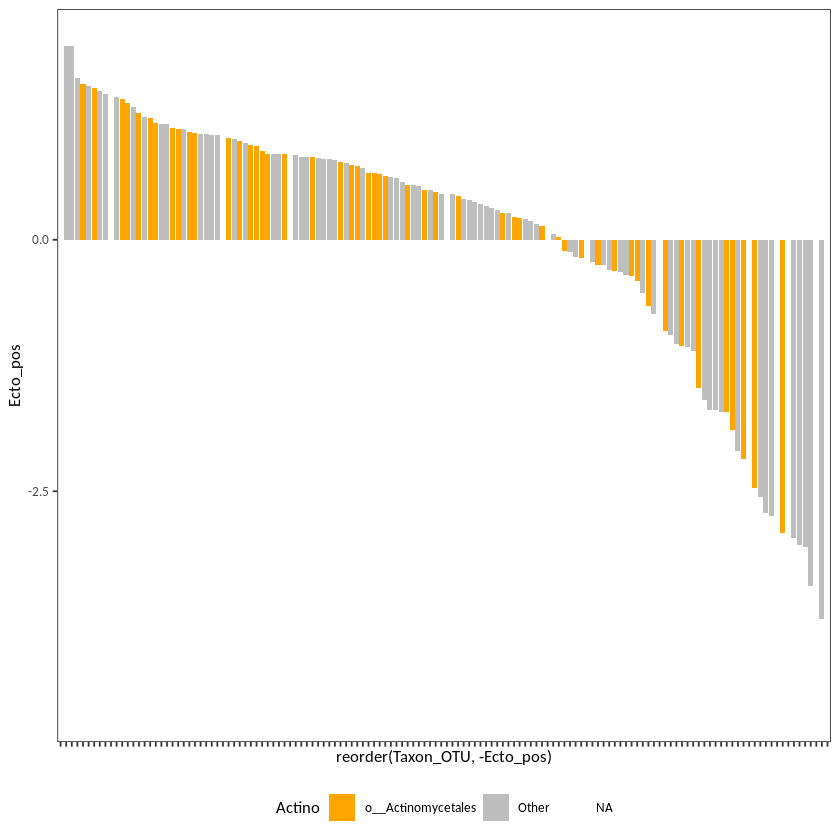

In [11]:
p = ggplot(actino, aes(x = reorder(Taxon_OTU, -Ecto_pos), y = Ecto_pos, fill=Actino)) + geom_bar(stat="identity")

#Option two for specifying two colors for column where I specify 'Taxon A' (e.g. "Actinomycetales") vs 'other'
p = p + scale_fill_manual(values=c("Orange","Gray"))


p = p + theme_bw() + theme(text=element_text(size=10, color="black",family="Calibri"),
                           #legend.key = element_blank(),
                           #axis.text.x = element_text(angle = 90, hjust = 1),
                           axis.text.x = element_blank(),
                           plot.title = element_text(hjust = 0.5),
                           legend.position = "bottom",
                           #axis.title.y=element_blank(),
                           panel.grid.major = element_blank(),
                           panel.grid.minor = element_blank())

p

In [12]:
actino_only = subset(actino, Actino == "o__Actinomycetales")
hcaf.act = subset(actino_only, Host=="Hcaffer")
mafr.act = subset(actino_only, Host=="Mafricanus")
mmin.act = subset(actino_only, Host=="Mminor")
relo.act = subset(actino_only, Host=="Reloquens")

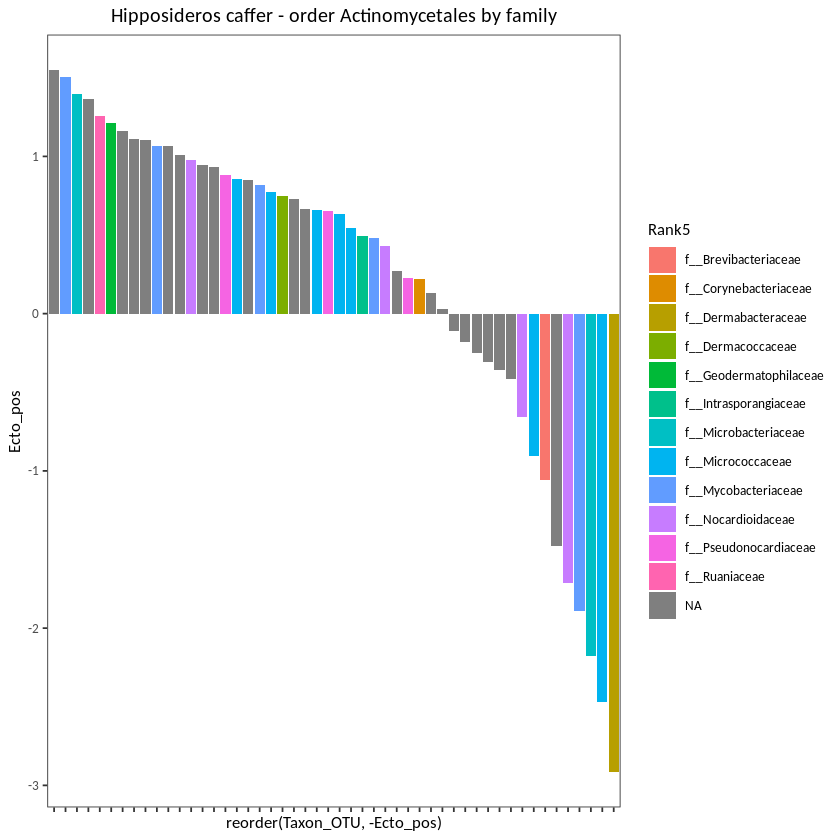

In [14]:
p = ggplot(hcaf.act, aes(x = reorder(Taxon_OTU, -Ecto_pos), y = Ecto_pos, fill=Rank5)) + geom_bar(stat="identity")

p = p + ggtitle("Hipposideros caffer - order Actinomycetales by family")                     

p = p + theme_bw() + theme(text=element_text(size=10, color="black",family="Calibri"),
                           axis.text.x = element_blank(),
                           plot.title = element_text(hjust = 0.5),
                           legend.position = "right",
                           panel.grid.major = element_blank(),
                           panel.grid.minor = element_blank())

p


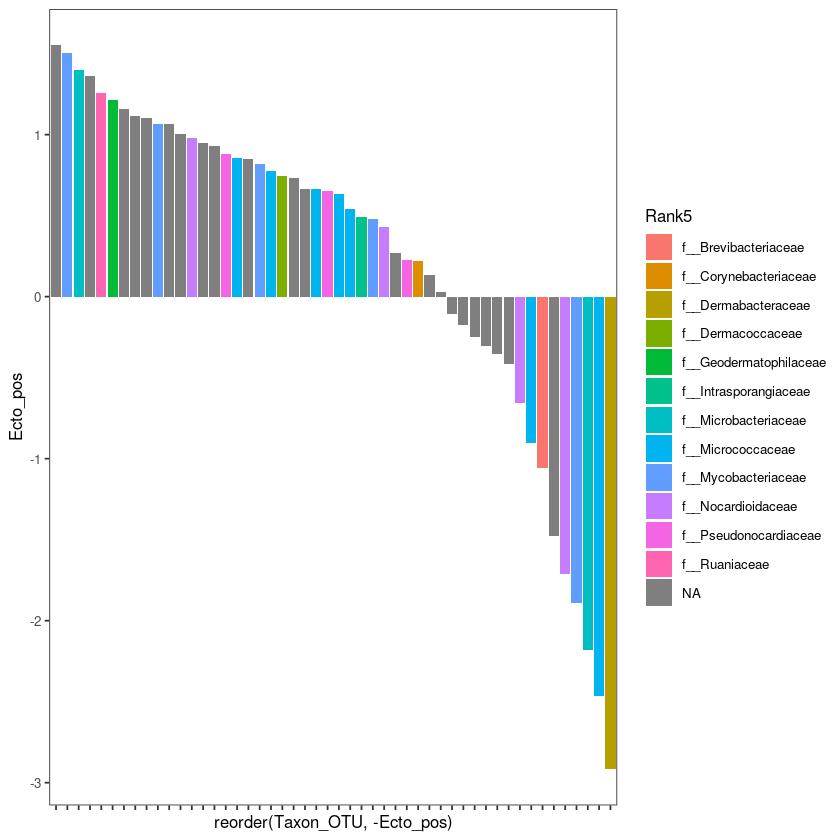

In [23]:
p = ggplot(hcaf.act, aes(x = reorder(Taxon_OTU, -Ecto_pos), y = Ecto_pos, fill=Rank5)) + geom_bar(stat="identity")
                               
#p = p + geom_text(aes(label=Shared), position=position_dodge(width=0.9), vjust=-0.25)

p = p + theme_bw() + theme(text=element_text(size=10, color="black",family="Calibri"),
                           axis.text.x = element_blank(),
                           plot.title = element_text(hjust = 0.5),
                           legend.position = "right",
                           panel.grid.major = element_blank(),
                           panel.grid.minor = element_blank())

p
